<a href="https://colab.research.google.com/github/ravitata/tensorflow2/blob/master/w2_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
from sklearn.datasets import load_diabetes
diabetes_data = load_diabetes()

In [3]:
print(diabetes_data.keys())

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [4]:
print(diabetes_data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [5]:
data = diabetes_data['data']
target = diabetes_data['target']

In [6]:
#target
target = (target - target.mean(axis=0))/target.std()
target

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [7]:
data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [8]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, target, test_size=0.1, random_state=1)

print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)


(397, 10)
(45, 10)
(397,)
(45,)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
def get_model(input_shape):
  model = Sequential([
                      Dense(128, activation='relu', input_shape=input_shape),
                      Dense(128, activation='relu'),
                      Dense(128, activation='relu'),
                      Dense(128, activation='relu'),
                      Dense(128, activation='relu'),
                      Dense(128, activation='relu'),
                      Dense(1)
  ])
  return model

In [11]:
model = get_model((train_data.shape[1],))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [13]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [14]:
#print(model.weights)
print('input shape = ',model.input_shape)
print('metrics = ', model.metrics_names)

input shape =  (None, 10)
metrics =  []


In [15]:
loss, mae = model.evaluate(train_data, train_targets)
print('loss= ', loss)
print('mae= ', mae)

13/13 [==============================] - 0s 2ms/step - loss: 1.0202 - mae: 0.8669
loss=  1.0201770067214966
mae=  0.8669217824935913


In [16]:
history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64, verbose=1)

Epoch 1/100
6/6 [==============================] - 0s 10ms/step - loss: 0.9943 - mae: 0.8559 - val_loss: 1.0800 - val_mae: 0.8860
Epoch 2/100
6/6 [==============================] - 0s 4ms/step - loss: 0.9210 - mae: 0.8218 - val_loss: 0.9521 - val_mae: 0.8262
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 0.7284 - mae: 0.7178 - val_loss: 0.7690 - val_mae: 0.7080
Epoch 4/100
6/6 [==============================] - 0s 5ms/step - loss: 0.5652 - mae: 0.6092 - val_loss: 0.5628 - val_mae: 0.5786
Epoch 5/100
6/6 [==============================] - 0s 5ms/step - loss: 0.4638 - mae: 0.5458 - val_loss: 0.6971 - val_mae: 0.6675
Epoch 6/100
6/6 [==============================] - 0s 5ms/step - loss: 0.4736 - mae: 0.5634 - val_loss: 0.5277 - val_mae: 0.5848
Epoch 7/100
6/6 [==============================] - 0s 5ms/step - loss: 0.4712 - mae: 0.5460 - val_loss: 0.4857 - val_mae: 0.5505
Epoch 8/100
6/6 [==============================] - 0s 5ms/step - loss: 0.4360 - mae: 0.5367 - va

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
df = pd.DataFrame(history.history)

In [19]:
df.head()

,loss,mae,val_loss,val_mae
0,0.994319,0.855866,1.080034,0.886040
1,0.920954,0.821849,0.952104,0.826162
2,0.728357,0.717776,0.769030,0.708048
3,0.565152,0.609226,0.562806,0.578550
4,0.463760,0.545794,0.697087,0.667536


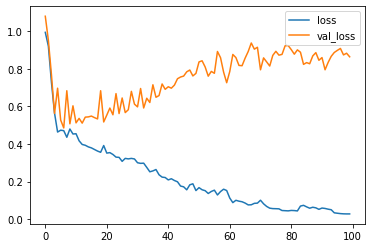

In [20]:
df[['loss', 'val_loss']].plot()
plt.show()


In [21]:
loss, mae = model.evaluate(test_data, test_targets, verbose=2)
print('loss= ', loss)
print('mae= ', mae)

2/2 - 0s - loss: 0.7901 - mae: 0.6844
loss=  0.7900766134262085
mae=  0.684444010257721


In [22]:
model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.7901 - mae: 0.6844


[0.7900766134262085, 0.684444010257721]

## Regularization and Dropout

In [23]:
tf.keras.backend.clear_session()

In [35]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

In [25]:
def get_model(input_shape, wd, dr):
  model = Sequential([
                      Dense(128, kernel_regularizer=tf.keras.regularizers.l2(wd), activation='relu', input_shape=input_shape),
                      Dropout(dr),
                      Dense(128, kernel_regularizer=tf.keras.regularizers.l2(wd), activation='relu'),
                      Dropout(dr),
                      Dense(128, kernel_regularizer=tf.keras.regularizers.l2(wd), activation='relu'),
                      Dropout(dr),
                      Dense(128, kernel_regularizer=tf.keras.regularizers.l2(wd), activation='relu'),
                      Dropout(dr),
                      Dense(128, kernel_regularizer=tf.keras.regularizers.l2(wd), activation='relu'),
                      Dropout(dr),
                      Dense(128, kernel_regularizer=tf.keras.regularizers.l2(wd), activation='relu'),
                      Dropout(dr),
                      Dense(1)
  ])
  return model

In [26]:
weight_decay = 1e-3  #l2 regularization param
dropout_rate = 0.3
model=get_model((train_data.shape[1],), weight_decay, dropout_rate)

In [27]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [28]:
history = model.fit(train_data,train_targets, epochs = 100, validation_split=0.15, batch_size=64, verbose=2)

Epoch 1/100
6/6 - 0s - loss: 1.6379 - mae: 0.8577 - val_loss: 1.7174 - val_mae: 0.9010
Epoch 2/100
6/6 - 0s - loss: 1.5802 - mae: 0.8540 - val_loss: 1.6574 - val_mae: 0.8957
Epoch 3/100
6/6 - 0s - loss: 1.5181 - mae: 0.8459 - val_loss: 1.5817 - val_mae: 0.8788
Epoch 4/100
6/6 - 0s - loss: 1.4287 - mae: 0.8184 - val_loss: 1.4644 - val_mae: 0.8352
Epoch 5/100
6/6 - 0s - loss: 1.2736 - mae: 0.7567 - val_loss: 1.2913 - val_mae: 0.7423
Epoch 6/100
6/6 - 0s - loss: 1.1283 - mae: 0.6930 - val_loss: 1.1222 - val_mae: 0.6567
Epoch 7/100
6/6 - 0s - loss: 1.0603 - mae: 0.6560 - val_loss: 1.0882 - val_mae: 0.6662
Epoch 8/100
6/6 - 0s - loss: 0.9766 - mae: 0.6273 - val_loss: 1.0157 - val_mae: 0.6565
Epoch 9/100
6/6 - 0s - loss: 0.9603 - mae: 0.6457 - val_loss: 1.0789 - val_mae: 0.6999
Epoch 10/100
6/6 - 0s - loss: 0.8960 - mae: 0.6056 - val_loss: 0.9424 - val_mae: 0.6177
Epoch 11/100
6/6 - 0s - loss: 0.9068 - mae: 0.6248 - val_loss: 0.9497 - val_mae: 0.6232
Epoch 12/100
6/6 - 0s - loss: 0.9024 - ma

In [29]:
model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.7646 - mae: 0.6167


[0.7645960450172424, 0.6166869401931763]

In [30]:
df = pd.DataFrame(history.history)

In [31]:
df.head()

,loss,mae,val_loss,val_mae
0,1.637914,0.857735,1.717443,0.901041
1,1.580225,0.853961,1.657420,0.895683
2,1.518054,0.845922,1.581680,0.878769
3,1.428745,0.818397,1.464403,0.835217
4,1.273594,0.756671,1.291342,0.742255


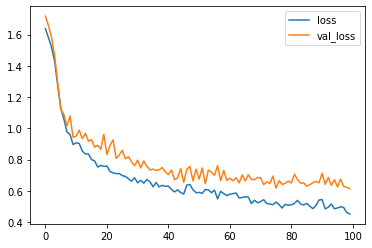

In [32]:
#No Dropout layer
df[['loss', 'val_loss']].plot()
plt.show()

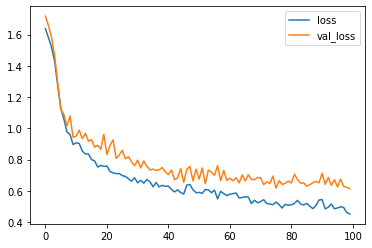

In [33]:
#With Dropout late and rate = 0.3
df[['loss', 'val_loss']].plot()
plt.show()